# Lecture 9: Time series analysis
ENVR 890-010: Python for Environmental Research, Fall 2021

October 29, 2021

By Andrew Hamilton, modified by Rosa Cuppari. Some material adapted from Greg Characklis, David Gorelick and H.B. Zeff.

## Summary
In this lecture, we will learn how to use **time series analysis** to create **synthetic records** using historical data. We will use real data of historical inflows into Shasta Reservoir in northern California.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##read input data
shasta = pd.read_csv('shasta_inflow.csv', header=2)

## just care about inflow column
shasta = shasta.iloc[:, 0:2]
shasta.columns = ['date', 'inflow']
shasta.head()

,date,inflow
0,Oct-80,"18,040"
1,Nov-80,"18,040"
2,Dec-80,"27,590"
3,Jan-81,"36,940"
4,Feb-81,"49,280"


In [103]:
## transform date to datetime type and set index 
##   (see here for datetime format specifiers: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)
shasta['date'] = pd.to_datetime(shasta['date'], format='%b-%y')
shasta.index = shasta['date']
shasta = shasta.iloc[:, [1]]
shasta.head()

,inflow
date,
1980-10-01,"18,040"
1980-11-01,"18,040"
1980-12-01,"27,590"
1981-01-01,"36,940"
1981-02-01,"49,280"


In [104]:
## create time step variable (note order of dates)
shasta['time'] = list(range(shasta.shape[0]))
shasta.iloc[:20,:]

,inflow,time
date,,
1980-10-01,"18,040",0
1980-11-01,"18,040",1
1980-12-01,"27,590",2
1981-01-01,"36,940",3
1981-02-01,"49,280",4
1981-03-01,"79,000",5
1981-04-01,"33,790",6
1981-05-01,"24,630",7
1981-06-01,"19,310",8


In [107]:
### weirdness here is because inflow is a string. turns out the data is formatted with commas at thousands. need to remove.
#print(shasta.head())
#print()

## we can do this two ways -- with list comprehension, or a for loop 

shasta['inflow_new'] = [s.replace(',','') for s in shasta['inflow']]
print(shasta.head())
print()

#print(shasta.dtypes)
shasta['inflow_new2'] = 0 
for i in range(0,len(shasta['inflow'])): 
    new = shasta['inflow'].iloc[i]
    shasta['inflow_new2'].iloc[i] = new.replace(',','')
print(shasta.head())
print()

## now convert to numeric type
shasta['inflow_new'] = pd.to_numeric(shasta['inflow_new'])
shasta['inflow_new2'] = pd.to_numeric(shasta['inflow_new2'])


            inflow  time inflow_new  inflow_new2
date                                            
1980-10-01  18,040     0      18040        18040
1980-11-01  18,040     1      18040        18040
1980-12-01  27,590     2      27590        27590
1981-01-01  36,940     3      36940        36940
1981-02-01  49,280     4      49280        49280

            inflow  time inflow_new inflow_new2
date                                           
1980-10-01  18,040     0      18040       18040
1980-11-01  18,040     1      18040       18040
1980-12-01  27,590     2      27590       27590
1981-01-01  36,940     3      36940       36940
1981-02-01  49,280     4      49280       49280



In [108]:
print('working')
shasta.head()

working


,inflow,time,inflow_new,inflow_new2
date,,,,
1980-10-01,"18,040",0,18040,18040
1980-11-01,"18,040",1,18040,18040
1980-12-01,"27,590",2,27590,27590
1981-01-01,"36,940",3,36940,36940
1981-02-01,"49,280",4,49280,49280


(array([367.,  56.,  22.,  20.,   5.,   3.,   3.,   2.,   1.,   1.]),
 array([ 11800.,  52560.,  93320., 134080., 174840., 215600., 256360.,
        297120., 337880., 378640., 419400.]),
 <a list of 10 Patch objects>)

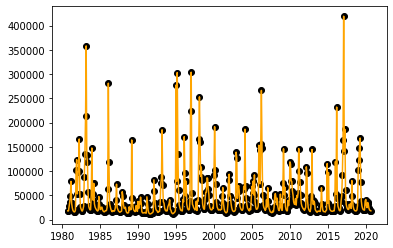

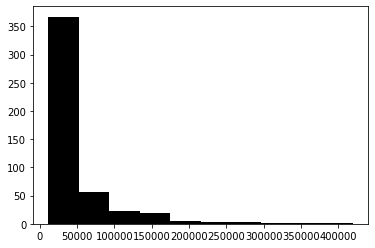

In [109]:
### plot data
plt.figure()
plt.scatter(shasta.index,shasta['inflow_new'], color = 'black')
plt.plot(shasta['inflow_new'],color='orange')
plt.figure()
plt.hist(shasta['inflow_new'], color = 'black')

In [116]:
### fit to lognormal distribution
from scipy.stats import lognorm, gamma, norm

ln_shape, ln_loc, ln_scale = lognorm.fit(shasta['inflow_new'])
ln_shape, ln_loc, ln_scale

(1.17000294351462, 11488.66279965279, 17421.080931349352)

In [117]:
### check fit
shasta['inflow_new'].mean()
print(f"Mean: data = {shasta['inflow_new'].mean()}, fit = {lognorm.mean(ln_shape, ln_loc, ln_scale)}")
print(f"Std: data = {shasta['inflow_new'].std()}, fit = {lognorm.std(ln_shape, ln_loc, ln_scale)}")
      
print('Std: ' + str(shasta['inflow_new'].std()))

Mean: data = 46920.05, fit = 46029.228979321575
Std: data = 52118.67731949847, fit = 59134.531366248055
Std: 52118.67731949847


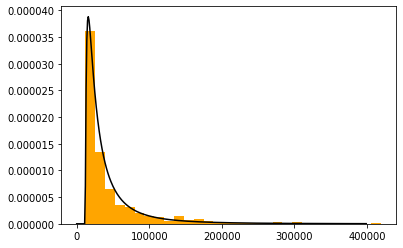

In [118]:
### plot theoretical distribution vs histogram
flow = np.arange(0, 400000, 1000)
ln_pdf = lognorm.pdf(flow, ln_shape, ln_loc, ln_scale)

plt.hist(shasta['inflow_new'], density=True, bins=30, color = 'orange')
plt.plot(flow, ln_pdf, color = 'black')

In [119]:
### now generate a synthetic record of length 480 months (40 years)
shasta['synthetic1_inflow'] = lognorm.rvs(ln_shape, ln_loc, ln_scale, size=480)
shasta['synthetic1_inflow']

date
1980-10-01    18838.585961
1980-11-01    43037.454003
1980-12-01    16282.979180
1981-01-01    52148.190516
1981-02-01    77264.715967
                  ...     
2020-05-01    25374.859426
2020-06-01    74675.275886
2020-07-01    16571.024238
2020-08-01    56323.195966
2020-09-01    81028.937794
Name: synthetic1_inflow, Length: 480, dtype: float64

### In-class exercise
1. Plot the shasta corrected inflow data compared to the synthetic data. Do this two ways (hint: scatter plot & line plot)
1. Plot just the first five years (hint: one year = 12 months - obvious, I know)
1. Plot the two datasets as histograms

Make sure to include labels and legends for each plot

In [120]:
### what about seasonality? we know that flow varies in predictable way from season to season.
shasta['month'] = shasta.index.month

monthly_mean = shasta.groupby('month').mean()['inflow_new']
monthly_std = shasta.groupby('month').std()['inflow_new']
monthly_std


month
1     66399.428282
2     84932.869224
3     73653.921698
4     54323.871697
5     30773.351441
6     13698.485590
7      5627.160451
8      4179.013259
9      4718.133359
10     8136.188860
11    15923.530043
12    49743.751787
Name: inflow_new, dtype: float64

Text(0, 0.5, 'inflow (AF)')

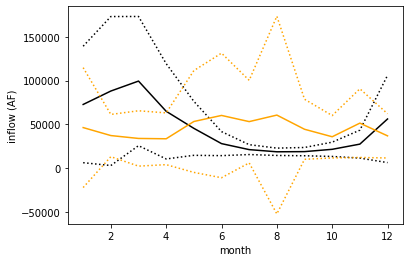

In [121]:
monthly_mean_synthetic1 = shasta.groupby('month').mean()['synthetic1_inflow']
monthly_std_synthetic1 = shasta.groupby('month').std()['synthetic1_inflow']

plt.plot(monthly_mean, color='k')
plt.plot(monthly_mean + monthly_std, color='k', ls=':')
plt.plot(monthly_mean - monthly_std, color='k', ls=':')

plt.plot(monthly_mean_synthetic1, color='orange')
plt.plot(monthly_mean_synthetic1 + monthly_std_synthetic1, color='orange', ls=':')
plt.plot(monthly_mean_synthetic1 - monthly_std_synthetic1, color='orange', ls=':')

plt.xlabel('month')
plt.ylabel('inflow (AF)')

### In-class exercise 
Check for trends over time, i.e. whether there is a relationship between inflows and year. In that case, we would want to work with the residual data for further analysis. Hint: regressions!

Is there a relationship?

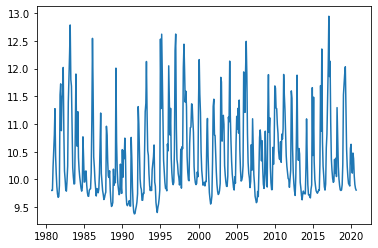

In [122]:
### Want to account for seasonality and autocorrelation. First log transform.
shasta['log'] = np.log(shasta['inflow_new'])
plt.plot(shasta['log'])

In [123]:
import statsmodels.formula.api as sm



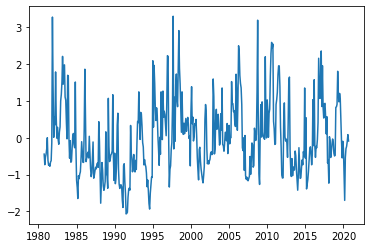

In [124]:
### There are a few ways to deal with any trends, but we will "deseasonalize" data by converting to monthly z-scores
monthly_mean_log = shasta.groupby('month').mean()['log']
monthly_std_log = shasta.groupby('month').std()['log']

shasta['deseas'] = shasta['log'].copy()
for i in range(1, 13):
    mu = monthly_mean_log[i]
    sigma = monthly_std_log[i]
    shasta['deseas'].loc[shasta['month'] == i] = (shasta['deseas'].loc[shasta['month'] == i] - mu) / sigma
    
plt.plot(shasta['deseas'])

(array([ 11.,  61., 101., 118.,  73.,  50.,  32.,  22.,   8.,   4.]),
 array([-2.06683404, -1.53048268, -0.99413133, -0.45777997,  0.07857138,
         0.61492274,  1.1512741 ,  1.68762545,  2.22397681,  2.76032816,
         3.29667952]),
 <a list of 10 Patch objects>)

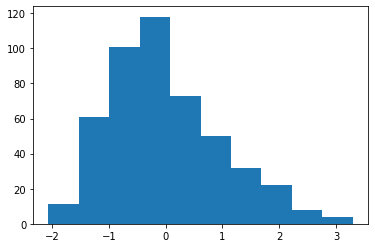

In [125]:
plt.hist(shasta['deseas'])

<Figure size 432x288 with 0 Axes>

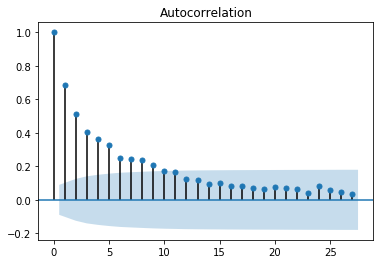

In [126]:
### This looks more random! But let's check whether autocorrelation seems significant
from statsmodels.graphics.tsaplots import plot_acf
plt.figure()
fig = plot_acf(shasta['deseas'])

In [127]:
shasta.head()

,inflow,time,inflow_new,inflow_new2,synthetic1_inflow,month,log,deseas
date,,,,,,,,
1980-10-01,"18,040",0,18040,18040,18838.585961,10,9.800347,-0.444284
1980-11-01,"18,040",1,18040,18040,43037.454003,11,9.800347,-0.731735
1980-12-01,"27,590",2,27590,27590,16282.979180,12,10.225209,-0.530423
1981-01-01,"36,940",3,36940,36940,52148.190516,1,10.517050,-0.444682
1981-02-01,"49,280",4,49280,49280,77264.715967,2,10.805274,-0.297438


In [128]:
### create lag variables to deal with auto-correlation
shasta['deseas_l1'] = np.nan
shasta['deseas_l2'] = np.nan
shasta['deseas_l3'] = np.nan
shasta['deseas_l12'] = np.nan
print(shasta.head())
print()

shasta['deseas_l1'].iloc[1:] = shasta['deseas'].values[:-1]
shasta['deseas_l2'].iloc[2:] = shasta['deseas'].values[:-2]
shasta['deseas_l3'].iloc[3:] = shasta['deseas'].values[:-3]
shasta['deseas_l12'].iloc[12:] = shasta['deseas'].values[:-12]

shasta.head

            inflow  time  inflow_new  inflow_new2  synthetic1_inflow  month  \
date                                                                          
1980-10-01  18,040     0       18040        18040       18838.585961     10   
1980-11-01  18,040     1       18040        18040       43037.454003     11   
1980-12-01  27,590     2       27590        27590       16282.979180     12   
1981-01-01  36,940     3       36940        36940       52148.190516      1   
1981-02-01  49,280     4       49280        49280       77264.715967      2   

                  log    deseas  deseas_l1  deseas_l2  deseas_l3  deseas_l12  
date                                                                          
1980-10-01   9.800347 -0.444284        NaN        NaN        NaN         NaN  
1980-11-01   9.800347 -0.731735        NaN        NaN        NaN         NaN  
1980-12-01  10.225209 -0.530423        NaN        NaN        NaN         NaN  
1981-01-01  10.517050 -0.444682        NaN        N

<bound method NDFrame.head of             inflow  time  inflow_new  inflow_new2  synthetic1_inflow  month  \
date                                                                          
1980-10-01  18,040     0       18040        18040       18838.585961     10   
1980-11-01  18,040     1       18040        18040       43037.454003     11   
1980-12-01  27,590     2       27590        27590       16282.979180     12   
1981-01-01  36,940     3       36940        36940       52148.190516      1   
1981-02-01  49,280     4       49280        49280       77264.715967      2   
...            ...   ...         ...          ...                ...    ...   
2020-05-01  31,934   475       31934        31934       25374.859426      5   
2020-06-01  23,458   476       23458        23458       74675.275886      6   
2020-07-01  20,061   477       20061        20061       16571.024238      7   
2020-08-01  18,682   478       18682        18682       56323.195966      8   
2020-09-01  18,143   4

In [129]:
### set up autoregressive models with different lags
lm_log_ar = sm.ols('deseas ~ deseas_l1 + deseas_l2 + deseas_l3 + deseas_l12', data=shasta)
lm_log_ar_fit = lm_log_ar.fit()
print(lm_log_ar_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 deseas   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     104.6
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           2.19e-63
Time:                        14:30:56   Log-Likelihood:                -511.32
No. Observations:                 468   AIC:                             1033.
Df Residuals:                     463   BIC:                             1053.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0049      0.034      0.147      0.8

In [130]:
### set up autoregressive models with different lags
lm_log_ar = sm.ols('deseas ~ deseas_l1 + deseas_l2 + deseas_l3', data=shasta)
lm_log_ar_fit = lm_log_ar.fit()
print(lm_log_ar_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 deseas   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     143.7
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           3.50e-66
Time:                        14:30:57   Log-Likelihood:                -517.27
No. Observations:                 477   AIC:                             1043.
Df Residuals:                     473   BIC:                             1059.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0018      0.033      0.056      0.9

In [131]:
### set up autoregressive models with different lags
lm_log_ar = sm.ols('deseas ~ deseas_l1 + deseas_l2', data=shasta)
lm_log_ar_fit = lm_log_ar.fit()
print(lm_log_ar_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 deseas   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     215.5
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           2.53e-67
Time:                        14:30:57   Log-Likelihood:                -518.51
No. Observations:                 478   AIC:                             1043.
Df Residuals:                     475   BIC:                             1056.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0017      0.033      0.053      0.9

In [132]:
### set up autoregressive models with different lags
lm_log_ar = sm.ols('deseas ~ deseas_l1', data=shasta)
lm_log_ar_fit = lm_log_ar.fit()
print(lm_log_ar_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 deseas   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     428.5
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           2.15e-68
Time:                        14:30:58   Log-Likelihood:                -520.49
No. Observations:                 479   AIC:                             1045.
Df Residuals:                     477   BIC:                             1053.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0008      0.033      0.024      0.9

In [133]:
### set up autoregressive models with different lags
lm_log_ar = sm.ols('deseas ~ deseas_l1 + deseas_l12', data=shasta)
lm_log_ar_fit = lm_log_ar.fit()
print(lm_log_ar_fit.summary())
### although deseas_l12 is not significant, this one is still best in terms of AIC/BIC, so let's go with it.

                            OLS Regression Results                            
Dep. Variable:                 deseas   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     206.7
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           5.89e-65
Time:                        14:30:58   Log-Likelihood:                -513.07
No. Observations:                 468   AIC:                             1032.
Df Residuals:                     465   BIC:                             1045.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0051      0.034      0.152      0.8

            inflow  time  inflow_new  inflow_new2  synthetic1_inflow  month  \
date                                                                          
1980-10-01  18,040     0       18040        18040       18838.585961     10   
1980-11-01  18,040     1       18040        18040       43037.454003     11   
1980-12-01  27,590     2       27590        27590       16282.979180     12   
1981-01-01  36,940     3       36940        36940       52148.190516      1   
1981-02-01  49,280     4       49280        49280       77264.715967      2   
...            ...   ...         ...          ...                ...    ...   
2020-05-01  31,934   475       31934        31934       25374.859426      5   
2020-06-01  23,458   476       23458        23458       74675.275886      6   
2020-07-01  20,061   477       20061        20061       16571.024238      7   
2020-08-01  18,682   478       18682        18682       56323.195966      8   
2020-09-01  18,143   479       18143        18143   

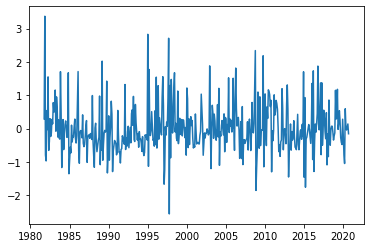

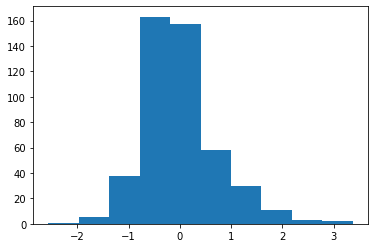

<Figure size 432x288 with 0 Axes>

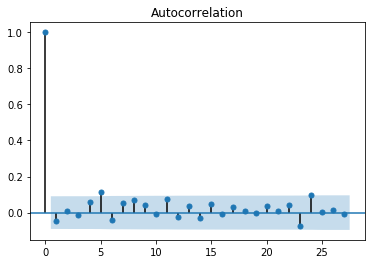

In [134]:
### now look at residuals to see if they look like "white noise" (uncorrelated & normally distributed)
shasta['ar_resid'] = lm_log_ar_fit.resid
print(shasta)

plt.figure()
plt.plot(shasta['ar_resid'])

plt.figure()
plt.hist(shasta['ar_resid'])

plt.figure()
fig = plot_acf(shasta['ar_resid'].iloc[12:])

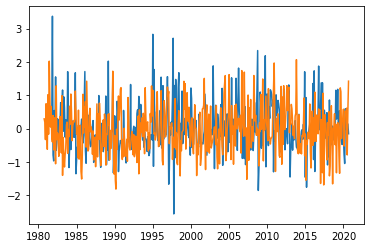

In [135]:
### ok, so we have "whitened" data! Now what? Now we can turn around and create synthetic data by reversing the process

## first, generate synthetic normally distributed data:
shasta['synthetic2_noise'] = norm.rvs(shasta['ar_resid'].mean(), shasta['ar_resid'].std(), size=shasta.shape[0])

plt.plot(shasta['ar_resid'])
plt.plot(shasta['synthetic2_noise'])

In [136]:
### now apply the AR relationship. here is a function to get regression prediction
def predict_ar(lag1, lag12):
    return lm_log_ar_fit.params[0] + lm_log_ar_fit.params[1] * lag1 + lm_log_ar_fit.params[2] * lag12

In [137]:
### We need 12 years of lagged data to start, we can use the last 12 years of real data
max_lag = 12
nrow = shasta.shape[0]

synth_ar = list(shasta['deseas'].iloc[-max_lag:])
synth_ar

[-0.09792584872618817,
 -0.5475876282161891,
 -0.09502852787233809,
 -0.2982314261607055,
 -0.9723064332676717,
 -1.6995636521606121,
 -0.5426345851536128,
 -0.29971257285774494,
 -0.2339307085905822,
 -0.10197063412202698,
 0.08428937601882568,
 -0.08900534098288752]

In [138]:
### now add prediction plus noise to get AR time series
for i in range(nrow):
    lag12 = synth_ar[i]
    lag1 = synth_ar[i + max_lag - 1]
    prediction = predict_ar(lag1, lag12)
    noise = shasta['synthetic2_noise'].iloc[i]
    synth_ar.append(prediction + noise)
    
shasta['synthetic2_deseas'] = synth_ar[-nrow:]
shasta

,inflow,time,inflow_new,inflow_new2,synthetic1_inflow,month,log,deseas,deseas_l1,deseas_l2,deseas_l3,deseas_l12,ar_resid,synthetic2_noise,synthetic2_deseas
date,,,,,,,,,,,,,,,
1980-10-01,"18,040",0,18040,18040,18838.585961,10,9.800347,-0.444284,NaN,NaN,NaN,NaN,NaN,0.290448,0.233564
1980-11-01,"18,040",1,18040,18040,43037.454003,11,9.800347,-0.731735,-0.444284,NaN,NaN,NaN,NaN,0.190201,0.348654
1980-12-01,"27,590",2,27590,27590,16282.979180,12,10.225209,-0.530423,-0.731735,-0.444284,NaN,NaN,NaN,-0.331962,-0.089567
1981-01-01,"36,940",3,36940,36940,52148.190516,1,10.517050,-0.444682,-0.530423,-0.731735,-0.444284,NaN,NaN,0.744300,0.684707
1981-02-01,"49,280",4,49280,49280,77264.715967,2,10.805274,-0.297438,-0.444682,-0.530423,-0.731735,NaN,NaN,0.133549,0.595540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,"31,934",475,31934,31934,25374.859426,5,10.371427,-0.299713,-0.542635,-1.699564,-0.972306,1.206725,0.052203,0.430936,0.729029
2020-06-01,"23,458",476,23458,23458,74675.275886,6,10.062967,-0.233931,-0.299713,-0.542635,-1.699564,0.973991,-0.045411,0.610775,1.102044
2020-07-01,"20,061",477,20061,20061,16571.024238,7,9.906533,-0.101971,-0.233931,-0.299713,-0.542635,1.203015,0.038914,-0.793459,-0.058866


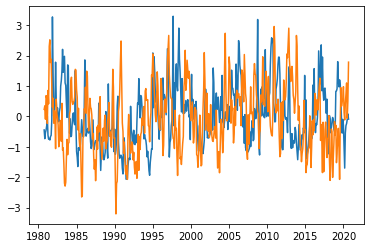

In [139]:
### this synthetic time series (noise + AR relationship) looks similar to our original deseasonalized data
plt.plot(shasta['deseas'])
plt.plot(shasta['synthetic2_deseas'])


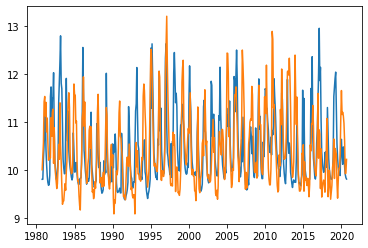

In [140]:
### next step is to reseasonalize by converting from monthly z-scores back to log-scale data
shasta['synthetic2_log'] = shasta['synthetic2_deseas'].copy()
for i in range(1, 13):
    mu = monthly_mean_log[i]
    sigma = monthly_std_log[i]
    shasta['synthetic2_log'].loc[shasta['month'] == i] = shasta['synthetic2_log'].loc[shasta['month'] == i] * sigma + mu
    
plt.plot(shasta['log'])
plt.plot(shasta['synthetic2_log'])

In [141]:
### lastly, we take the exp to convert from log scale back to inflows in AF
shasta['synthetic2_inflow'] = np.exp(shasta['synthetic2_log'])

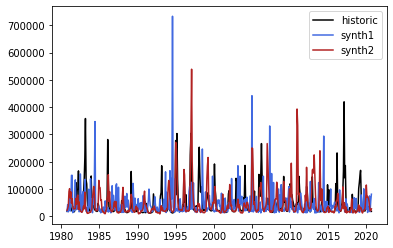

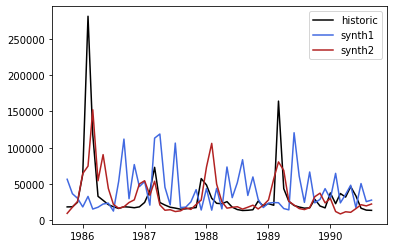

In [142]:
### plot original data vs synthetic1 vs synthetic2
plt.figure()
plt.plot(shasta['inflow_new'], color='k', label='historic')
plt.plot(shasta['synthetic1_inflow'], color='royalblue', label='synth1')
plt.plot(shasta['synthetic2_inflow'], color='firebrick', label='synth2')
plt.legend()

plt.figure()
plt.plot(shasta['inflow_new'].iloc[60:120], color='k', label='historic')
plt.plot(shasta['synthetic1_inflow'].iloc[60:120], color='royalblue', label='synth1')
plt.plot(shasta['synthetic2_inflow'].iloc[60:120], color='firebrick', label='synth2')
plt.legend()

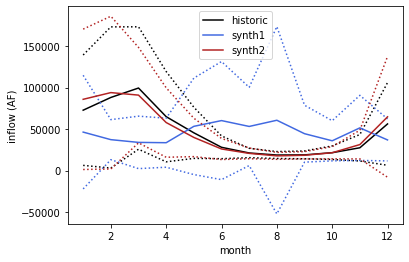

In [143]:
### look at monthly statistics (log space)
monthly_mean_synthetic2 = shasta.groupby('month').mean()['synthetic2_inflow']
monthly_std_synthetic2 = shasta.groupby('month').std()['synthetic2_inflow']

plt.plot(monthly_mean, color='k', label='historic')
plt.plot(monthly_mean + monthly_std, color='k', ls=':')
plt.plot(monthly_mean - monthly_std, color='k', ls=':')

plt.plot(monthly_mean_synthetic1, color='royalblue', label='synth1')
plt.plot(monthly_mean_synthetic1 + monthly_std_synthetic1, color='royalblue', ls=':')
plt.plot(monthly_mean_synthetic1 - monthly_std_synthetic1, color='royalblue', ls=':')

plt.plot(monthly_mean_synthetic2, color='firebrick', label='synth2')
plt.plot(monthly_mean_synthetic2 + monthly_std_synthetic2, color='firebrick', ls=':')
plt.plot(monthly_mean_synthetic2 - monthly_std_synthetic2, color='firebrick', ls=':')

plt.xlabel('month')
plt.ylabel('inflow (AF)')
plt.legend()

In [144]:
### Now what can we do with this? Run it through (very simplified) Shasta Reservoir!
storage_max = 4.5e6    ## max storage at shasta is ~4.5 million AF
storage_tmin1 = 2.25e6   ## let's assume it starts half full
inflow = list(shasta['inflow_new'])   ## inflow in AF/month
demand = shasta['inflow_new'].mean() * 0.8  ## assume demand is 80% of average inflow

### function for releases based on demand and max storage capacity
def get_release_storage(storage_tmin1, storage_max, inflow, demand):
    release = demand
    storage_t = storage_tmin1 + inflow - release
    if storage_t < 0:
        release += storage_t
        storage_t = 0
    elif storage_t > storage_max:
        release += (storage_t - storage_max)
        storage_t = storage_max
    return release, storage_t

release_1, storage_1 = get_release_storage(storage_tmin1, storage_max, inflow[0], demand)
release_1, storage_1

(37536.04, 2230503.96)

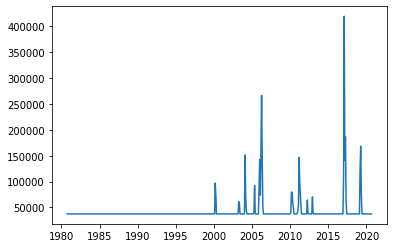

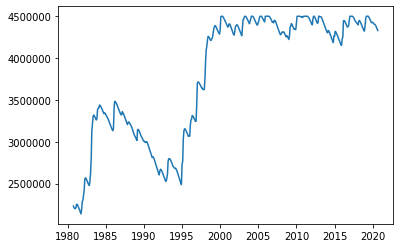

In [145]:
### run through simulation & store results in pandas
shasta['release'] = -1.
shasta['storage'] = -1.

for t in range(nrow):
    release, storage_t = get_release_storage(storage_tmin1, storage_max, inflow[t], demand)    
    shasta['release'].iloc[t] = release
    shasta['storage'].iloc[t] = storage_t
    storage_tmin1 = storage_t

shasta

plt.figure()
plt.plot(shasta['release'])

plt.figure()
plt.plot(shasta['storage'])

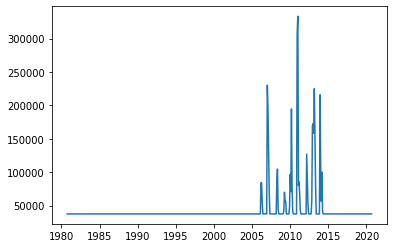

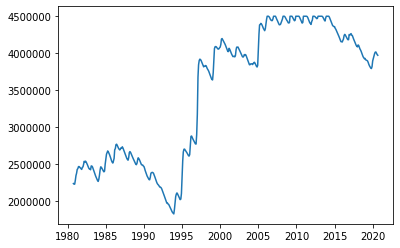

In [146]:
### repeat for synthetic data
storage_max = 4.5e6    ## max storage at shasta is ~4.5 million AF
storage_tmin1 = 2.25e6   ## let's assume it starts half full
inflow = list(shasta['synthetic2_inflow'])   ## inflow in AF/month
demand = shasta['inflow_new'].mean() * 0.8  ## assume demand is 80% of average (historical) inflow

shasta['synthetic2_release'] = -1.
shasta['synthetic2_storage'] = -1.

for t in range(nrow):
    release, storage_t = get_release_storage(storage_tmin1, storage_max, inflow[t], demand)    
    shasta['synthetic2_release'].iloc[t] = release
    shasta['synthetic2_storage'].iloc[t] = storage_t
    storage_tmin1 = storage_t

plt.figure()
plt.plot(shasta['synthetic2_release'])

plt.figure()
plt.plot(shasta['synthetic2_storage'])

In [147]:
### what if demand is expected to grow by 0.1%/month?
### repeat for synthetic data
storage_max = 4.5e6    ## max storage at shasta is ~4.5 million AF
storage_tmin1 = 2.25e6   ## let's assume it starts half full
inflow = list(shasta['synthetic2_inflow'])   ## inflow in AF/month

demand_0 = shasta['inflow_new'].mean() * 0.8  ## assume demand is 80% of average (historical) inflow at start
demand = [demand_0 * (1.001)**t for t in range(nrow)]
# demand

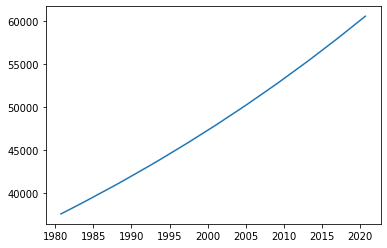

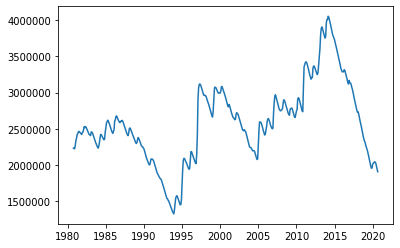

In [148]:
shasta['synthetic2_release'] = -1.
shasta['synthetic2_storage'] = -1.

for t in range(nrow):
    release, storage_t = get_release_storage(storage_tmin1, storage_max, inflow[t], demand[t])    
    shasta['synthetic2_release'].iloc[t] = release
    shasta['synthetic2_storage'].iloc[t] = storage_t
    storage_tmin1 = storage_t

plt.figure()
plt.plot(shasta['synthetic2_release'])

plt.figure()
plt.plot(shasta['synthetic2_storage'])

### Expanding our synthetic timeseries

Let's generate 10,000 different synthetic inflow scenarios, each of which is 20 years (240 months) long. We will store the final synthetic inflows in a 10,000x240 NumPy array. We want to use NumPy arrays rather than Pandas for all synthetic generation steps (e.g. white noise, deseasonalized residual, etc), since this is significantly faster and simpler when dealing with a lot of repitition.

In [151]:
## variables for sythetic data
nyear = 20
nmonth = nyear * 12
nsim = 10000

## first, generate synthetic normally distributed data:
noise = norm.rvs(shasta['ar_resid'].mean(), shasta['ar_resid'].std(), size=(nsim, nmonth))

print(noise.shape)
print(noise)

(10000, 240)
[[-0.30417421  0.01737694  0.35906052 ...  0.36243531 -1.47861408
   1.0032275 ]
 [ 1.11802753 -0.30696248 -0.42509428 ... -0.2059073  -0.74364679
   0.28437464]
 [ 0.98948864 -0.68948681  0.60416536 ...  0.82988216  0.45504863
  -0.73831684]
 ...
 [ 0.40159038 -0.32303275  0.32935672 ... -0.04921894 -1.00128545
   0.92633325]
 [ 0.52588846 -0.38286355 -0.06305736 ...  1.29223787 -0.92197213
  -0.45073001]
 [ 0.49851038 -0.05953349  0.0738036  ...  0.41643609 -1.56998933
   0.20516224]]


In [152]:
### now apply the AR relationship. here is a function to apply regression prediction
def predict_ar(lag1, lag12):
    return lm_log_ar_fit.params[0] + lm_log_ar_fit.params[1] * lag1 + lm_log_ar_fit.params[2] * lag12

### We need 12 years of lagged data to start, we can use the last 12 years of real data
max_lag = 12
deseas = np.zeros((nsim, nmonth+max_lag))
deseas[:, :max_lag] = list(shasta['ar_resid'].iloc[-max_lag:])
### now add prediction plus noise to get AR time series
for i in range(nmonth):
    lag12 = deseas[:, i]
    lag1 = deseas[:, i + max_lag - 1]
    prediction = predict_ar(lag1, lag12)
    deseas[:, i + max_lag] = prediction + noise[:, i]

deseas = deseas[:, max_lag:]
    
print(deseas.shape)
print(deseas)

(10000, 240)
[[-0.41131773 -0.26431837  0.1866877  ...  0.79578294 -0.90331471
   0.41691613]
 [ 1.01088401  0.38376069 -0.15434851 ... -0.15215428 -0.83291938
  -0.27672959]
 [ 0.88234512 -0.08665103  0.55327109 ...  0.3025797   0.68433476
  -0.25167951]
 ...
 [ 0.29444686 -0.12216746  0.25417839 ...  0.57395043 -0.61392493
   0.5108001 ]
 [ 0.41874494 -0.09701048 -0.12103482 ...  1.13307847 -0.14000484
  -0.52937676]
 [ 0.39136685  0.20760004  0.22410101 ... -0.14452802 -1.66699373
  -0.92625592]]


In [153]:
## now reseasonalize using the monthly means and stds, to get to log-scale inflows
month = [t % 12 + 1 for t in range(nmonth)]
log = deseas.copy()
for i in range(nmonth):
    mu = monthly_mean_log[month[i]]
    sigma = monthly_std_log[month[i]]
    log[:, i] = log[:, i] * sigma + mu
print(log.shape)
print(log)

(10000, 240)
[[10.54361211 10.83201709 11.40486556 ... 10.16550187  9.72635503
  10.94635557]
 [11.67584371 11.35533565 11.17128367 ...  9.88636858  9.7567122
  10.41832864]
 [11.57351238 10.97548202 11.65594517 ... 10.02027132 10.41101054
  10.43739762]
 ...
 [11.10547964 10.94680279 11.45109115 ... 10.1001802   9.85115103
  11.01782326]
 [11.20443481 10.96711685 11.19410082 ... 10.26482323 10.0555236
  10.22600495]
 [11.18263879 11.21308736 11.43049061 ...  9.88861423  9.39702726
   9.92388691]]


In [154]:
### lastly, exponentiate to get back to original scale (AF/month)
synth_inflow = np.exp(log)

print(synth_inflow.shape)
print(synth_inflow)

(10000, 240)
[[ 37934.34244422  50615.70010246  89757.38217165 ...  25990.9029275
   16753.37529389  56746.85787862]
 [117694.04656175  85420.00944087  71060.270014   ...  19660.53440599
   17269.75873756  33467.45119046]
 [106245.99423787  58423.99869175 115375.25384819 ...  22477.52765329
   33223.42699559  34111.76511508]
 ...
 [ 66534.74953165  56772.24227039  94003.86287302 ...  24347.39646067
   18980.18898315  60950.86112388]
 [ 73455.48164323  57937.31016831  72700.3020794  ...  28704.90309038
   23284.04402735  27611.97821937]
 [ 71871.76657206  74093.81652394  92087.14290726 ...  19704.73484136
   12052.49850664  20412.17692826]]


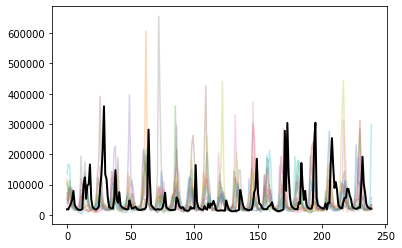

In [155]:
### plot next to original data to make sure it looks ok
for s in range(10):
    plt.plot(synth_inflow[s, :], alpha=0.3)
plt.plot(shasta['inflow_new'].iloc[:nmonth].values, color='k', lw=2)

In [156]:
### save data 
np.savetxt('synth_inflow.csv', synth_inflow, delimiter=',')

**This has been a very brief intro to the large field of time series analysis**. Here are some other interesting concepts that you can explore on your own if you are so inclined. Email me if you'd like a list of references.
1. Auto-regressive moving average (ARMA) models add correlated error terms to an AR model, which can help create more sustained devations from "normal" behavior
1. Auto-regressive integrated moving average (ARIMA) models add an "integration" term which accounts for linear trends
1. ARIMAX models add exogenous predictor variables (X) to an ARIMA model. For example maybe you want to provide an el nino-southern oscillation (ENSO) signal that effects inflows.
1. Fourier analysis is an alternative to manual deseasonalization, by breaking down the signal into harmonic waves
1. Wavelet analysis is a more "fuzzy" version of Fourier analysis, which allows for quasi-harmonic signals (e.g., ENSO)
1. Multivariate synthetic time series with copulas, vector auto-regression, and other methods
2. Semiparametric sampling for finer-scale structure that is hard to capture with parametric methods (e.g., daily streamflow is much more irregular than monthly streamflow).
1. Hidden Markov Models are another cool alternative, which allows for random transitions between different "regimes" (e.g., wet period vs dry period), and then different probability distributions for streamflow within each regime